# Chapter 5
# Getting Started with Pandas (Part 1)

Pandas is a major tool of data scientists. It contains data structures and data manipulation tools designed to make data cleaning and analysis fast and easy.

In [99]:
import pandas as pd

## 1. Download and extract MovieLens data

- [GroupLens Research](https://grouplens.org) is a human-computer interaction research lab at University of Minnesota, Twin Cities. 
- [MovieLens](https://grouplens.org/datasets/movielens/) is a web-based recommender system and virtual community that recommends movies for its users to watch, based on their file preferences using collaborative filtering of members' movie ratings and movie reviews. 

In [100]:
# Download ml-latest-small.zip from https://grouplens.org/datasets/movielens/
import urllib.request
url = "http://files.grouplens.org/datasets/movielens/ml-latest-small.zip"
file_path = "Data/"

# To create a new folder:
# import os
# os.mkdir(file_path)

zip_file = "ml-latest-small.zip"
urllib.request.urlretrieve(url, file_path + zip_file)

('Data/ml-latest-small.zip', <http.client.HTTPMessage at 0x10a765ac8>)

In [101]:
# Decompress the zip file
import zipfile
f = zipfile.ZipFile(file_path + zip_file, "r")
f.printdir()
f.extractall(file_path)
f.close()

File Name                                             Modified             Size
ml-latest-small/                               2018-09-26 15:50:12            0
ml-latest-small/links.csv                      2018-09-26 15:50:10       197979
ml-latest-small/tags.csv                       2018-09-26 15:49:40       118660
ml-latest-small/ratings.csv                    2018-09-26 15:49:38      2483723
ml-latest-small/README.txt                     2018-09-26 15:50:12         8342
ml-latest-small/movies.csv                     2018-09-26 15:49:56       494431


In [102]:
# Since we only need the zip file in this step, 
# we can use the following strcuture:
with zipfile.ZipFile(file_path + zip_file, "r") as f:
    f.printdir()
    f.extractall(file_path)
# This cell does exactly the same thing as the above cell.

File Name                                             Modified             Size
ml-latest-small/                               2018-09-26 15:50:12            0
ml-latest-small/links.csv                      2018-09-26 15:50:10       197979
ml-latest-small/tags.csv                       2018-09-26 15:49:40       118660
ml-latest-small/ratings.csv                    2018-09-26 15:49:38      2483723
ml-latest-small/README.txt                     2018-09-26 15:50:12         8342
ml-latest-small/movies.csv                     2018-09-26 15:49:56       494431


In [103]:
# Check that files has been unzipped
import os
print(os.listdir(file_path + "ml-latest-small"))

['links.csv', 'tags.csv', 'ratings.csv', 'README.txt', 'movies.csv']


In [109]:
# Delete the zip file
os.remove(file_path + zip_file)
os.listdir(file_path)

['.DS_Store', 'ml-latest-small', 'cereal.csv']

In [110]:
# Write a function to download and decompress file
import os
import urllib.request
import zipfile

def get_movielens(file_path, file_name, delete_zip_file=False):
    url = "http://files.grouplens.org/datasets/movielens/" + file_name
    if not os.path.exists(file_path + file_name):
        urllib.request.urlretrieve(url, file_path + file_name)
        print("File", file_name, "downloaded.")
    with zipfile.ZipFile(file_path + file_name, "r") as f:
        f.extractall(file_path)
        print("Files extracted:")
        print(f.printdir())
    if delete_zip_file:
        os.remove(file_path + file_name)

In [111]:
file_path = "Data/"
zip_file = "ml-latest-small.zip"
get_movielens(file_path, zip_file)

File ml-latest-small.zip downloaded.
Files extracted:
File Name                                             Modified             Size
ml-latest-small/                               2018-09-26 15:50:12            0
ml-latest-small/links.csv                      2018-09-26 15:50:10       197979
ml-latest-small/tags.csv                       2018-09-26 15:49:40       118660
ml-latest-small/ratings.csv                    2018-09-26 15:49:38      2483723
ml-latest-small/README.txt                     2018-09-26 15:50:12         8342
ml-latest-small/movies.csv                     2018-09-26 15:49:56       494431
None


In [107]:
os.listdir(file_path)

['.DS_Store', 'ml-latest-small.zip', 'ml-latest-small', 'cereal.csv']

In [108]:
# A larger dataset is ml-20m
# get_movielens(file_path, "ml-20m.zip")

## 2. Load ratings data as a pandas DataFrame
- Load csv file as a DataFrame
- head()
- shape, columns, dtypes
- indexing with loc[]
- Handle date and time data
- Data transformation with apply()

In [112]:
import pandas as pd
ratings_df = pd.read_csv("Data/ml-latest-small/ratings.csv",
                         delimiter=",")
ratings_df.head()  # Show the first several rows of the dataset

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [113]:
ratings_df.tail()

,userId,movieId,rating,timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


In [114]:
print("Columns:", ", ".join(ratings_df.columns))

Columns: userId, movieId, rating, timestamp


In [115]:
print("Shape:", ratings_df.shape)

Shape: (100836, 4)


In [126]:
print("Data types:\n", ratings_df.dtypes)

Data types:
 userId                int64
movieId               int64
rating              float64
timestamp             int64
Year                  int64
Month                 int64
Day                   int64
Hour                float64
Minute              float64
Second              float64
DT           datetime64[ns]
Quarter               int64
dtype: object


In [127]:
# Convert time stamp to a readable format

# Example: convert the first time stamp
timestamp = ratings_df.loc[0, "timestamp"]
print(timestamp)

from datetime import datetime
dt = datetime.fromtimestamp(timestamp)
print(dt)

ratings_df.loc[0, "Year"] = dt.year
ratings_df.loc[0, "Month"] = dt.month
ratings_df.loc[0, "Day"] = dt.day
ratings_df.loc[0, "Hour"] = dt.hour
ratings_df.loc[0, "Minute"] = dt.minute
ratings_df.loc[0, "Second"] = dt.second
ratings_df.head()

964982703
2000-07-30 14:45:03


,userId,movieId,rating,timestamp,Year,Month,Day,Hour,Minute,Second,DT,Quarter
0,1,1,4.0,964982703,2000,7,30,14.0,45.0,3.0,2000-07-30 14:45:03,3
1,1,3,4.0,964981247,2000,7,30,NaN,NaN,NaN,2000-07-30 14:20:47,3
2,1,6,4.0,964982224,2000,7,30,NaN,NaN,NaN,2000-07-30 14:37:04,3
3,1,47,5.0,964983815,2000,7,30,NaN,NaN,NaN,2000-07-30 15:03:35,3
4,1,50,5.0,964982931,2000,7,30,NaN,NaN,NaN,2000-07-30 14:48:51,3


In [128]:
# change the format of datetime
print(dt)
dt2 = dt.strftime('%Y - %b - %d')
print(dt2)

2000-07-30 14:45:03
2000 - Jul - 30


In [129]:
# Use apply() to apply a function to all rows
ratings_df["DT"] = ratings_df["timestamp"].apply(datetime.fromtimestamp)
ratings_df.head()

,userId,movieId,rating,timestamp,Year,Month,Day,Hour,Minute,Second,DT,Quarter
0,1,1,4.0,964982703,2000,7,30,14.0,45.0,3.0,2000-07-30 14:45:03,3
1,1,3,4.0,964981247,2000,7,30,NaN,NaN,NaN,2000-07-30 14:20:47,3
2,1,6,4.0,964982224,2000,7,30,NaN,NaN,NaN,2000-07-30 14:37:04,3
3,1,47,5.0,964983815,2000,7,30,NaN,NaN,NaN,2000-07-30 15:03:35,3
4,1,50,5.0,964982931,2000,7,30,NaN,NaN,NaN,2000-07-30 14:48:51,3


In [134]:
# Fill the year column
ratings_df['Year'] = ratings_df['DT'].dt.year
ratings_df['Month'] = ratings_df['DT'].dt.month
ratings_df['Day'] = ratings_df['DT'].dt.day

ratings_df.head()

,userId,movieId,rating,timestamp,Year,Month,Day,Hour,Minute,Second,DT,Quarter
0,1,1,4.0,964982703,2000,7,30,14.0,45.0,3.0,2000-07-30 14:45:03,3
1,1,3,4.0,964981247,2000,7,30,NaN,NaN,NaN,2000-07-30 14:20:47,3
2,1,6,4.0,964982224,2000,7,30,NaN,NaN,NaN,2000-07-30 14:37:04,3
3,1,47,5.0,964983815,2000,7,30,NaN,NaN,NaN,2000-07-30 15:03:35,3
4,1,50,5.0,964982931,2000,7,30,NaN,NaN,NaN,2000-07-30 14:48:51,3


In [135]:
# apply() can be used to apply user-defined functions

# Exercise: define a function that convert month to Q1 - Q4, and 
# use this function to create a "Quarter" column:

def convertMonToQuarter(month):
    if(month < 4):
        quarter = 1
    if (month>= 4 and month<7):
        quarter = 2
    if (month >= 7 and month < 9):
        quarter = 3
    if(month >= 9):
        quarter = 4
    return quarter    
convertMonToQuarter(8)

3

In [137]:
ratings_df["Quarter"] = ratings_df['Month'].apply(convertMonToQuarter)

In [138]:
ratings_df.tail()

,userId,movieId,rating,timestamp,Year,Month,Day,Hour,Minute,Second,DT,Quarter
100831,610,166534,4.0,1493848402,2017,5,3,NaN,NaN,NaN,2017-05-03 17:53:22,2
100832,610,168248,5.0,1493850091,2017,5,3,NaN,NaN,NaN,2017-05-03 18:21:31,2
100833,610,168250,5.0,1494273047,2017,5,8,NaN,NaN,NaN,2017-05-08 15:50:47,2
100834,610,168252,5.0,1493846352,2017,5,3,NaN,NaN,NaN,2017-05-03 17:19:12,2
100835,610,170875,3.0,1493846415,2017,5,3,NaN,NaN,NaN,2017-05-03 17:20:15,2


In [139]:
df = pd.DataFrame({"Test1": [70, 80, 90],
                   "Test2": [75, 85, 95],
                   "Test3": [80, 90, 100]})

df.head()

,Test1,Test2,Test3
0,70,75,80
1,80,85,90
2,90,95,100


In [140]:
import numpy as np
# Exercise: apply np.sqrt() to calculate the square root of test 1 scores
df['Test1sq'] = df['Test1'].apply(np.sqrt)
df.head()

# Exercise: apply np.mean() to create an "Average" column
df['Mean'] = df.apply(np.mean, axis=1)
df.head()

# Exercise: create a "Max" column that stores the maximum value from each row
df['Max'] = df.apply(np.max, axis=1)
df.head()

# Without axis=1, the function is applied to each column of the data frame.
print(df.apply(np.max))

Test1       90.000000
Test2       95.000000
Test3      100.000000
Test1sq      9.486833
Mean        73.621708
Max        100.000000
dtype: float64


# 3. Save the processed ratings data

Data can be saved in many different formats. Today we will study two commonly used formats: csv and feather.
- csv: High readability and stable format
- feather: High read and write performance

In [141]:
# Save the processed data as a .csv file
csv_file = "Data/ml-latest-small/ratings_processed.csv"
ratings_df.to_csv(csv_file)

In [142]:
# Use Python package installer pip to install feather
!pip install --upgrade pip
!pip install feather-format

Requirement already up-to-date: pip in /Users/cloudburst/anaconda3/lib/python3.7/site-packages (19.2.3)


In [143]:
import feather
# Save the processed data as a .feather file
feather_file = "Data/ml-latest-small/ratings_processed.feather"
# feather.write_dataframe(ratings_df, feather_file)
ratings_df.to_feather(feather_file)

In [144]:
# Load .feather file as DataFrame
# ratings_df2 = feather.read_dataframe(feather_file)
ratings_df2 = pd.read_feather(feather_file)
ratings_df2.head()

,userId,movieId,rating,timestamp,Year,Month,Day,Hour,Minute,Second,DT,Quarter
0,1,1,4.0,964982703,2000,7,30,14.0,45.0,3.0,2000-07-30 14:45:03,3
1,1,3,4.0,964981247,2000,7,30,NaN,NaN,NaN,2000-07-30 14:20:47,3
2,1,6,4.0,964982224,2000,7,30,NaN,NaN,NaN,2000-07-30 14:37:04,3
3,1,47,5.0,964983815,2000,7,30,NaN,NaN,NaN,2000-07-30 15:03:35,3
4,1,50,5.0,964982931,2000,7,30,NaN,NaN,NaN,2000-07-30 14:48:51,3


In [145]:
import time
time.time()

1568835424.852573

In [146]:
# Time the writing speed
import time
start = time.time()
ratings_df.to_csv(csv_file)
end = time.time()
print("Writing to a csv file costs:", (end - start))
print("File size:", os.path.getsize(csv_file))

start = time.time()
ratings_df.to_feather(feather_file)
end = time.time()
print("Writing to a feather file costs:", (end - start))
print("File size:", os.path.getsize(feather_file))

Writing to a csv file costs: 1.1279568672180176
File size: 6500800
Writing to a feather file costs: 0.006553173065185547
File size: 9719208


In [147]:
# Exercise: Compare the loading time of csv and feather format

start = time.time()
ratings_df = pd.read_csv(csv_file,
                        delimiter=",")
end = time.time()
print(end-start)

start  = time.time()
ratings_df = pd.read_feather(feather_file)
end = time.time()
print(end - start)


0.1734931468963623
0.006907939910888672


## 4. pd.Series and pd.DataFrame

### Series

In [162]:
# Two important pandas data structure: Series (1D) and DataFrame (2D)
userId = ratings_df['userId']
# ?userId
# ?ratings_df

In [163]:
print(userId.values[:20])
print(userId.values[-20:])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[610 610 610 610 610 610 610 610 610 610 610 610 610 610 610 610 610 610
 610 610]


In [164]:
# Exercise: How many unique user IDs are there?
userId_set = set(userId)
print(len(userId_set))

610


In [165]:
# Index of userId
print(userId.index[:20])

RangeIndex(start=0, stop=20, step=1)


In [166]:
# Define a Series from scratch
series = pd.Series([4, 7, -5, 3],
                     index=['d', 'b', 'a', 'c'])
series

d    4
b    7
a   -5
c    3
dtype: int64

In [168]:
# slicing a Series
print("series['a']:")
print(series['a'])
print("\nseries[['a', 'b', 'c']]:")
print(series[['a', 'b', 'c']])
print("\nseries[series > 0]:")
print(series[series > 0])
# boolean values regarding index
print(series.index == 'a')
print(series[series.index == 'a'])

series['a']:
-5

series[['a', 'b', 'c']]:
a   -5
b    7
c    3
dtype: int64

series[series > 0]:
d    4
b    7
c    3
dtype: int64
[False False  True False]
a   -5
dtype: int64


In [169]:
# Arithmetic operations
print("series * 2:")
print(series * 2)

series * 2:
d     8
b    14
a   -10
c     6
dtype: int64


In [170]:
# Define a Series from a dictionary
dictionary = {'Ohio': 35000,
              'Texas': 71000,
              'Oregon': 16000,
              'Utah': 5000}
series2 = pd.Series(dictionary)
series2

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [171]:
# Add values
series2['New York'] = 12345
series2

Ohio        35000
Texas       71000
Oregon      16000
Utah         5000
New York    12345
dtype: int64

In [172]:
# Remove values
series2.drop('New York', inplace=True)
series2

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [173]:
# without inplace=True
series3 = series2.drop("Ohio")
series3

Texas     71000
Oregon    16000
Utah       5000
dtype: int64

### DataFrame

In [177]:
# Define a DataFrame from scratch
df1 = pd.DataFrame(np.random.rand(5, 3),
                   columns=['Feature1', 'Feature2', 'Feature3'])
df1.head()

,Feature1,Feature2,Feature3
0,0.456664,0.742927,0.460606
1,0.048539,0.434752,0.696070
2,0.962779,0.293980,0.324841
3,0.373664,0.022554,0.169335
4,0.984622,0.576535,0.529734


In [178]:
# Add values
df1.loc[1, 'Feature4'] = 1.234
df1

,Feature1,Feature2,Feature3,Feature4
0,0.456664,0.742927,0.460606,NaN
1,0.048539,0.434752,0.696070,1.234
2,0.962779,0.293980,0.324841,NaN
3,0.373664,0.022554,0.169335,NaN
4,0.984622,0.576535,0.529734,NaN


In [179]:
# Identify null values
df1.isnull()

,Feature1,Feature2,Feature3,Feature4
0,False,False,False,True
1,False,False,False,False
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True


In [180]:
# Cound number of missing values for each column
np.sum(df1.isnull(), axis=0)

Feature1    0
Feature2    0
Feature3    0
Feature4    4
dtype: int64

In [181]:
# Remove rows
df1.drop([0, 1], axis=0, inplace=True)
df1

,Feature1,Feature2,Feature3,Feature4
2,0.962779,0.293980,0.324841,NaN
3,0.373664,0.022554,0.169335,NaN
4,0.984622,0.576535,0.529734,NaN


In [182]:
# Reset index
df1.reset_index(inplace=True)
df1

,index,Feature1,Feature2,Feature3,Feature4
0,2,0.962779,0.293980,0.324841,NaN
1,3,0.373664,0.022554,0.169335,NaN
2,4,0.984622,0.576535,0.529734,NaN


In [51]:
# Remove columns
df1.drop(['Feature4'], axis=1, inplace=True)
df1

,index,Feature1,Feature2,Feature3
0,2,0.009772,0.838077,0.682077
1,3,0.163271,0.950079,0.226475
2,4,0.412713,0.308165,0.536306


In [184]:
# Remove columns
df1.drop(['index'], axis=1, inplace=True)
df1


,Feature1,Feature2,Feature3,Feature4
0,0.962779,0.293980,0.324841,NaN
1,0.373664,0.022554,0.169335,NaN
2,0.984622,0.576535,0.529734,NaN


In [188]:
# Exercise: Add one row to ratings_df and remove it.
ratings_df.loc[100836, [ 'userId', 'movieId', 'rating']] = [1.1, 2.2, 3.3]


In [187]:
ratings_df.tail()

,userId,movieId,rating,timestamp,Year,Month,Day,Hour,Minute,Second,DT,Quarter
100831,610.0,166534.0,4.0,1493848402,2017,5,3,NaN,NaN,NaN,2017-05-03 17:53:22,2
100832,610.0,168248.0,5.0,1493850091,2017,5,3,NaN,NaN,NaN,2017-05-03 18:21:31,2
100833,610.0,168250.0,5.0,1494273047,2017,5,8,NaN,NaN,NaN,2017-05-08 15:50:47,2
100834,610.0,168252.0,5.0,1493846352,2017,5,3,NaN,NaN,NaN,2017-05-03 17:19:12,2
100835,610.0,170875.0,3.0,1493846415,2017,5,3,NaN,NaN,NaN,2017-05-03 17:20:15,2


In [190]:
ratings_df.drop([100836], axis=0, inplace=True)

## 5. Analyzing MovieLens Data

In [198]:
# Use value_counts() to find the rating frequencies
rating_frequencies = ratings_df['rating'].value_counts()
print(rating_frequencies)

4.0    26818
3.0    20047
5.0    13211
3.5    13135
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
3.3        1
Name: rating, dtype: int64


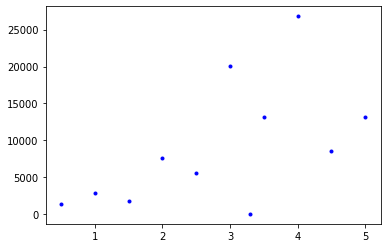

In [200]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(rating_frequencies.index,
        rating_frequencies.values,
        'b.')

In [ ]:
# Applying value_counts() to a data frame will give an error
# ratings_df.value_counts()

In [216]:
# rating_frequencies = ratings_df['Year'].value_counts()
# print(rating_frequencies)

# What are the rating frequencies in 2018?


# Find the slice that correspond to 2018 ratings
index_2018 = ratings_df['Year'] == 2018
# print(index_2018)

# Extract all 2018 ratings
ratings_2018 = ratings_df[index_2018]
ratings_2018.head()
print("Shape of the sub data frame:", ratings_2018.shape)
print(ratings_2018['Year'].value_counts())

Shape of the sub data frame: (6413, 12)
2018.0    6413
Name: Year, dtype: int64


In [218]:
# find the ratings frequencies of the subset
rating_freq_2018 = ratings_2018['rating'].value_counts()
print(rating_freq_2018)

4.0    1345
3.5     971
3.0     857
4.5     770
5.0     763
2.5     556
2.0     521
1.5     268
0.5     182
1.0     180
Name: rating, dtype: int64


Text(0, 0.5, 'Relative frequency')

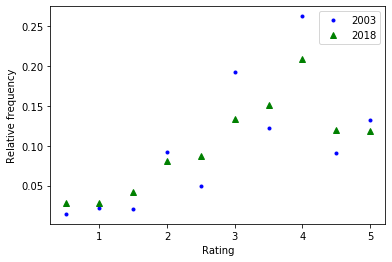

In [225]:
# What are the rating frequencies in 2003?
rating_freq_2003 = ratings_df[ratings_df['Year'] == 2003]['rating'].value_counts()
plt.plot(rating_freq_2003 / np.sum(rating_freq_2003), 'b.', label="2003")
plt.plot(rating_freq_2018 / np.sum(rating_freq_2018), 'g^', label="2018")
plt.legend()
plt.xlabel("Rating")
plt.ylabel("Relative frequency")

3.3891314517386557


(0, 5)

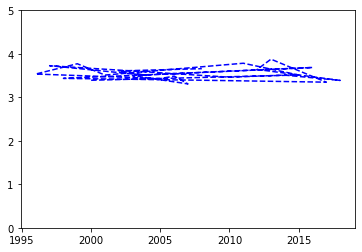

In [233]:
# How consistent are the average ratings over time?


# Example: average rating of 2018
index_2018 = (ratings_df['Year'] == 2018)
ratings_2018 = ratings_df[index_2018]
avg_rating = np.mean(ratings_2018['rating'])
print(avg_rating)

# Get the set of all years in the dataset
# set(ratings_df['Year']
years = ratings_df['Year'].unique()
all_avg_ratings = []
for year in years:
    index_year = (ratings_df['Year'] == year)
    ratings_year = ratings_df[index_year]
    avg_rating = np.mean(ratings_year['rating'])
    all_avg_ratings.append(avg_rating)
plt.plot(years, all_avg_ratings, 'b--')
plt.ylim(0,5)

In [56]:
# Do movies ratings inflate over time?



In [57]:
# How many movies were rated in 2003? in 2018?


In [58]:
# Do number of movies increase over time?



In [59]:
# How many ratings were submitted per year?



In [60]:
# How many users gave ratings per year?



In [61]:
# How consistent are the average ratings over time?



In [62]:
# Exercise: for each movie, find:
# 1. how many ratings were given to this movie
# 2. What is the highest and lowest rating
# 3. The frequency of each rating
# 4. When was the first rating given?
# 5. When was the last rating given?
# 6. What is the average rating?